# importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

## Loading the dataset into a pandas dataframe

In [2]:
df = pd.read_csv('seeds_dataset.txt', names=["data"])
df

,data
0,15.26\t14.84\t0.871\t5.763\t3.312\t2.221\t5.22\t1
1,14.88\t14.57\t0.8811\t5.554\t3.333\t1.018\t4.9...
2,14.29\t14.09\t0.905\t5.291\t3.337\t2.699\t4.82...
3,13.84\t13.94\t0.8955\t5.324\t3.379\t2.259\t4.8...
4,16.14\t14.99\t0.9034\t5.658\t3.562\t1.355\t5.1...
...,...
205,12.19\t13.2\t0.8783\t5.137\t2.981\t3.631\t4.87\t3
206,11.23\t12.88\t0.8511\t5.14\t2.795\t4.325\t5.00...
207,13.2\t13.66\t0.8883\t5.236\t3.232\t8.315\t5.05...
208,11.84\t13.21\t0.8521\t5.175\t2.836\t3.598\t5.0...


**Various features of a particular data point is tab spaceed in each row, so splitting it.**

In [3]:
df=df.data.apply(lambda x: pd.Series(str(x).split("\t")))
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       210 non-null    object
 1   1       210 non-null    object
 2   2       210 non-null    object
 3   3       210 non-null    object
 4   4       210 non-null    object
 5   5       210 non-null    object
 6   6       210 non-null    object
 7   7       210 non-null    object
dtypes: object(8)
memory usage: 13.2+ KB


## No we have to drop the 7th column of the dataframe, because it is the label of the data and we have to perform clustering.

### We will use the lables in later stages to compute the accuracy of our model.

In [5]:
data = df.drop([7], axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       210 non-null    object
 1   1       210 non-null    object
 2   2       210 non-null    object
 3   3       210 non-null    object
 4   4       210 non-null    object
 5   5       210 non-null    object
 6   6       210 non-null    object
dtypes: object(7)
memory usage: 11.6+ KB


In [7]:
# printing the first 10 rows of the data
data.head(10)

,0,1,2,3,4,5,6
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.1,0.8911,5.42,3.302,2.7,5
8,16.63,15.46,0.8747,6.053,3.465,2.04,5.877
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533


In [8]:
data = data.reset_index(drop = True)

In [9]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       210 non-null    object
 1   1       210 non-null    object
 2   2       210 non-null    object
 3   3       210 non-null    object
 4   4       210 non-null    object
 5   5       210 non-null    object
 6   6       210 non-null    object
dtypes: object(7)
memory usage: 11.6+ KB


,0,1,2,3,4,5,6
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [10]:
# assigning the column names as mentioned on the source website of the data
data= data.rename({0 : 'area', 1 : 'perimeter ', 2 : 'compactness', 3 : 'length of kernel', 4 : 'width of kernel', 5 : 'asymmetry coefficient', 6 : 'length of kernel groove'}, axis=1)

In [11]:
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


#### Building our model

In [12]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels

In [13]:
frame

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cluster
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2
...,...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,1
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,1
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1


In [14]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   area                     210 non-null    object
 1   perimeter                210 non-null    object
 2   compactness              210 non-null    object
 3   length of kernel         210 non-null    object
 4   width of kernel          210 non-null    object
 5   asymmetry coefficient    210 non-null    object
 6   length of kernel groove  210 non-null    object
 7   cluster                  210 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 13.2+ KB


In [15]:
# orignal labels(true_labels)
y_true = df.iloc[:, 7]
y_true

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: 7, Length: 210, dtype: object

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_true, frame['cluster'])
print("Accuracy score is", acc)

Accuracy score is 0.0


**The above cell is giving a very low accuracy score because:**

Even though the clusters could match almost perfectly to the original labels, their labels might be permuted because of the model own assignment of cluster ID.

So I am going to select randomly one point from each cluster and check their labels from the original data labels. Then we use this label for the whole cluster. Basically, we are ***renaming*** the clusters, ***not re-clustering*** the data.

In [17]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [18]:
permutation = find_permutation(3, y_true, frame['cluster'])
print(permutation)

['2', '3', '1']


In [19]:
new_labels = [ permutation[label] for label in labels]   # permute the labels
print("Accuracy score is", accuracy_score(y_true, new_labels))
Error_score = 1-accuracy_score(y_true, new_labels)
print("Error score is", Error_score)

Accuracy score is 0.8428571428571429
Error score is 0.15714285714285714


### Now in the above cell we can see that after adjusting the cluster Id's through permutation we get a very nice accuracy score of almost 92%.

In [20]:
# adding the new_labels column to the orignal dataframe in order to compare the cluster_id to the orignal labels
df['new_labels'] = new_labels
df.head(50)

,0,1,2,3,4,5,6,7,new_labels
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,1
7,14.11,14.1,0.8911,5.42,3.302,2.7,5,1,1
8,16.63,15.46,0.8747,6.053,3.465,2.04,5.877,1,1
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533,1,1


In [21]:
df.tail(50)

,0,1,2,3,4,5,6,7,new_labels
160,12.54,13.67,0.8425,5.451,2.879,3.082,5.491,3,3
161,12.02,13.33,0.8503,5.35,2.81,4.271,5.308,3,3
162,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,3,3
163,12.55,13.57,0.8558,5.333,2.968,4.419,5.176,3,3
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,3,3
165,12.1,13.15,0.8793,5.105,2.941,2.201,5.056,3,3
166,12.44,13.59,0.8462,5.319,2.897,4.924,5.27,3,3
167,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,3,3
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3,3
169,11.24,13,0.8359,5.09,2.715,3.521,5.088,3,3


## We can not visulaize clusters beacuse the dimension of the  individual data points is 6 which is  greater than 3,  and we can visualize any data in 3 dimenstions at most.

> **So for the illustration purpose, I am going to do clustring again using only two features and then plot the clusters.**

> **Orignal and full implementation is done above**

In [22]:
df_new = data.iloc[:, 4:6]
df_new

,width of kernel,asymmetry coefficient
0,3.312,2.221
1,3.333,1.018
2,3.337,2.699
3,3.379,2.259
4,3.562,1.355
...,...,...
205,2.981,3.631
206,2.795,4.325
207,3.232,8.315
208,2.836,3.598


In [23]:
gmm_new = GaussianMixture(n_components=3)
gmm_new.fit(df_new)

#predictions from gmm
labels_new = gmm_new.predict(df_new)
frame_new = pd.DataFrame(df_new)
frame_new['cluster'] = labels_new
frame_new.columns = ['width of kernel', 'asymmetry coefficient','cluster']

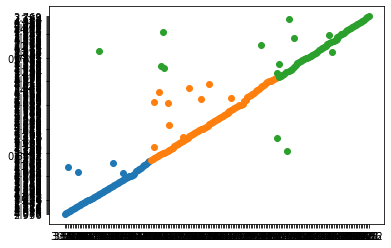

In [24]:
# plotting the clusters:
color=['blue','green','cyan']
for k in range(0,3):
    df_new = frame[frame["cluster"]==k]
    plt.scatter(df_new["width of kernel"],df_new["asymmetry coefficient"])
plt.show()